In [1]:
# Imports
import numpy as np
from scipy import random
from scipy.integrate import quad, dblquad
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import scipy.special as special

In [2]:

# define variables
m = 0     # price minimum (bottoming price)
M = 1   # price maximum (topping price)
d1 = 0.5
d2 = 0.5

eps = 0.01
a = 0.2     #a = measure of the strength of investor demand.
b = 0.88   #b = flocking coefficient of beta investors 0.88
c = 1     # market maker adjustment coefficient
v = 0.5    # current fundamental value 

p1 = np.linspace(m, M) #Price distribution

([], [])

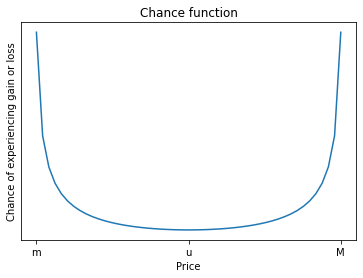

In [3]:
#weighting function, ,f(p), that represents the chance of lost
#opportunity either to fail to buy when the market is low
#or fail to sell when the market is high
y = (p1 - m + eps)**(-d1) * ((M + eps - p1)**(-d2))
plt.show()
plt.figure(1)
plt.title("Chance function")
plt.ylabel("Chance of experiencing gain or loss")
plt.xlabel("Price")
thing1 = np.array([0,0.5,1])
my_xticks = ['m','u','M']
plt.xticks(thing1, my_xticks)
plt.plot(p1, y)
#plt.xticks([])
plt.yticks([])


(0.0, 1.0)

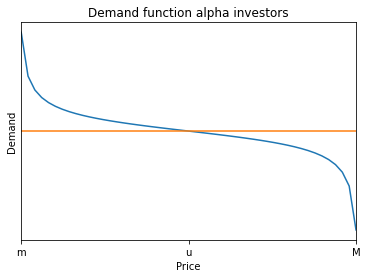

In [4]:

u = 0.5 #investment value
plt.figure(2)#demand function alpha investors
plt.plot(p1, y*a*(u-p1))
xaxis = [0,1]
yaxis = [0,0]
plt.title("Demand function alpha investors")
plt.ylabel("Demand")
plt.xlabel("Price")
plt.xticks(thing1, my_xticks)
plt.yticks([])
plt.plot(xaxis,yaxis)
plt.xlim([0, 1])

(0.0, 1.0)

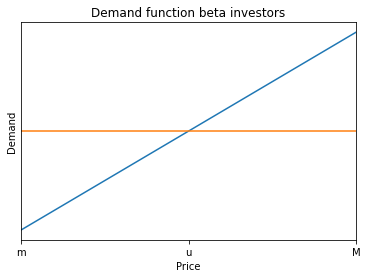

In [5]:
plt.figure(3)#demand function beta investors
plt.plot(p1, b*(p1 - v))
plt.title("Demand function beta investors")
plt.ylabel("Demand")
plt.xlabel("Price")
plt.xticks(thing1, my_xticks)
plt.yticks([])
plt.plot(xaxis,yaxis)
plt.xlim([0, 1])

(0.0, 1.0)

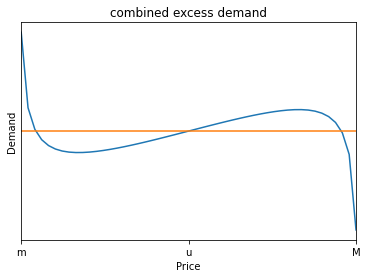

In [6]:
plt.figure(4) #aggregate excess demand function
E = (y*a*(u-p1)) + (b*(p1 - v))
plt.plot(p1, E ) # + 0.6 
plt.title("combined excess demand")
plt.ylabel("Demand")
plt.xlabel("Price")
plt.xticks(thing1, my_xticks)
plt.yticks([])
plt.plot(xaxis,yaxis)
plt.xlim([0, 1])

(0.0, 1.0)

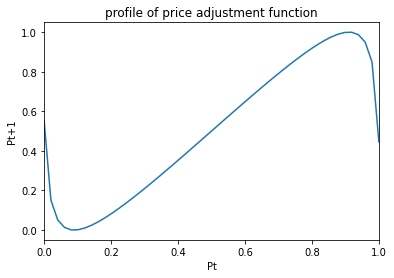

In [7]:
plt.figure(5) #profile of price adjustment function
plt.plot(p1,  p1 + c*E)
plt.title("profile of price adjustment function")
plt.xlabel("Pt")
plt.ylabel("Pt+1")
thing2 = np.array([0,1])
my_xticks = ['m','M']
plt.xlim([0, 1])

Text(0, 0.5, 'Price')

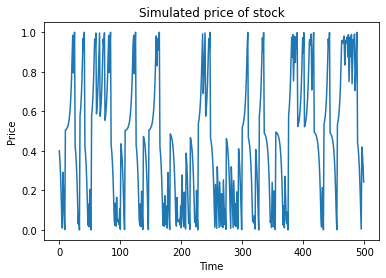

In [8]:

#demand function is chance function multiplied by aggregate excess demand (sum of demand functions)
def demand(x):
    return ((x - m + eps)**(-d1) * ((M + eps - x)**(-d2)) *a*(u-x)) + (b*(x - v))

length = 500 #time value 1000000
price = np.zeros(length+1)
time = np.zeros(length+1)
price[0] = 0.4  #initial price of stock

for i in range(length):
    price[i+1] = demand(price[i]) + price[i]
    time[i] = i
    
plt.figure(6) #simulation of price action
plt.plot(time[:length],  price[:length])
plt.title("Simulated price of stock")
plt.xlabel("Time")
plt.ylabel("Price")

Text(0, 0.5, 'Amounts')

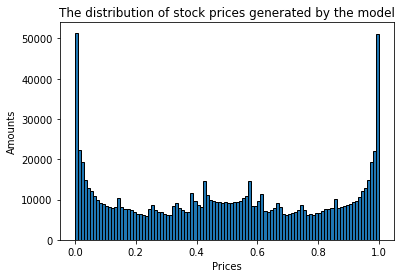

In [9]:

length = 1000000 #time value 1000000
price = np.zeros(length+1)
time = np.zeros(length+1)
price[0] = 0.4  #initial price of stock

for i in range(length):
    price[i+1] = demand(price[i]) + price[i]
    time[i] = i


plt.figure(7) #distribution of stock prices
plt.hist(price[:length], bins = 100, ec = 'black')
plt.title("The distribution of stock prices generated by the model")
plt.xlabel("Prices")
plt.ylabel("Amounts")

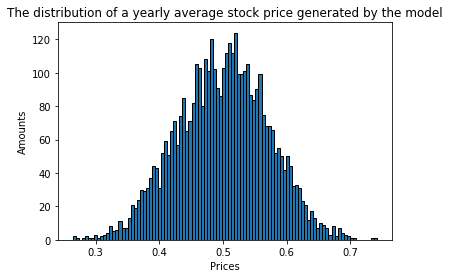

In [10]:

day_average = 240 #set average day 
averaged_price = np.zeros(length//day_average)
iterating_val = 0

for i in range(length//day_average):
    average_price_value = 0
    for j in range(day_average):
        average_price_value += price[j + iterating_val]
    averaged_price[i] = average_price_value/day_average
    iterating_val += day_average
    
plt.figure(8) #distribution of stock prices if day average
plt.hist(averaged_price, bins = 100, ec = 'black')
plt.title("The distribution of a yearly average stock price generated by the model")
plt.xlabel("Prices")
plt.ylabel("Amounts")


plt.show()


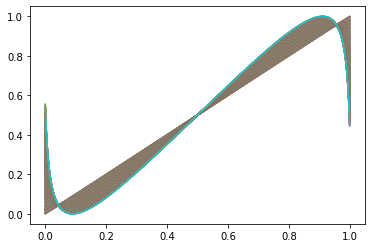

In [12]:

#logistic function
def logistic(r, x):
    return x + r * (x - m + eps)**(-d1) * ((M + eps - x)**(-d2)) *(a*(u-x)) + (b*(x - v))

n = 1000
last = 70

c = np.linspace(0 , 1, 300) #r value to be varied

p1 = np.linspace(m, M, 300) #Price distribution
y = (p1 - m + eps)**(-d1) * ((M + eps - p1)**(-d2))
E = (y*a*(u-p1)) + (b*(p1 - v))

plt.figure(9)
for i in range(len(p1)):
    plt.plot(p1,  p1 + c[i]*E)

(0.0, 1.0)

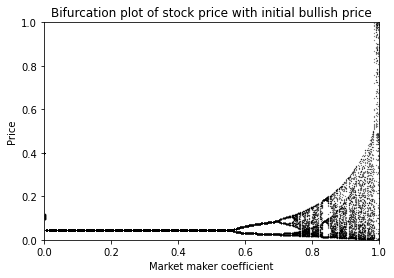

In [13]:

price = np.zeros(n+1)
price[0] = 0.4  #initial price of stock

def demand(x):
    return ((x - m + eps)**(-d1) * ((M + eps - x)**(-d2)) *a*(u-x)) + (b*(x - v))

plt.figure(10)
#c[0] = 0
val = 0


for i in range(len(c)):
    val = c[i]
    for k in range(n):
        price[k+1] = val * demand(price[k]) + price[k]
        if k >= (n - last):
            plt.plot(val ,price[k], color='black', marker='.', markersize= 0.4)
    price[0] = 0.4 #reset price for different market maker values


plt.title("Bifurcation plot of stock price with initial bullish price")
plt.xlabel("Market maker coefficient")
plt.ylabel("Price")    
plt.xlim([0, 1])
plt.ylim([0, 1])